In [1]:
# EXAMPLE FROM 
# https://pytorch.org/tutorials/beginner/pytorch_with_examples.html#examples
# Before running build data from
# https://github.com/kiichi/mnist-csv-png
# or Unzip mnist.csv.zip

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import csv

matplotlib.style.use('ggplot')
%matplotlib inline
plt.figure()

In [6]:
def loadData(filename):
    x = list()
    y = list()
    with open(filename, 'r') as csvfile:
        creader = csv.reader(csvfile, delimiter=',')
        for row in creader:
            # First column is the label / answer
            fig = row[0]
            # The rest of columns are pixcel data
            pix = np.array(row[1:]).astype('int')
            x.append(pix)
            z = np.zeros(10)
            z[int(fig)] = 1 # flag the one for the answer
            y.append(np.array([z]))
    return np.array(x),np.array(y)

In [3]:
def renderFig(arr):
    pix = arr.reshape(28,28)
#    plt.title('num:' + fig)
    plt.imshow(pix,cmap='gray')

In [7]:
file = '/Users/kiichitakeuchi/Downloads/mnist-csv-png-master/mnist_train.csv'
x,y = loadData(file)

# Train two hidden layers with backpropagation

In [27]:
# pick some random number for weight 
w1 = np.random.randn(784,100)
w2 = np.random.randn(100,10)

i = 0
learning_rate = 1e-6

print('epoch index : loss - predicted v.s actual')

# Run 100 Epochs
for t in range(100):
    # Pick 100 items to train
    for i in range(300,400):
        x_data = np.array([x[i]])
        y_data = y[i] #np.array([y[i]])
        
        # Get Prediction result and calculate loss
        h = x_data.dot(w1)
        h_relu = np.maximum(h, 0)
        
        y_pred = h_relu.dot(w2)
        y_pred = np.maximum(y_pred, 0)
        
        # Loss calculation. how far from the real results?
        if y_pred.sum() <= 0:
            continue
            
        y_pred = y_pred / y_pred.sum() # normalize it total of end result is always 1
        loss = np.square(y_pred - y_data).sum()
        #print(y_pred)
        if t % 10 == 0 and i < 10:
            print(t,i,':',loss, '-',np.argmax(y_pred),'v.s', np.argmax(y_data))

        # Backprop to compute gradients of w1 and w2 with respect to loss
        grad_y_pred = 2.0 * (y_pred - y_data)
        grad_w2 = h_relu.T.dot(grad_y_pred)
        grad_h_relu = grad_y_pred.dot(w2.T)
        grad_h = grad_h_relu.copy()
        grad_h[h < 0] = 0
        grad_w1 = x_data.T.dot(grad_h)
        # Update weights
        w1 -= learning_rate * grad_w1
        w2 -= learning_rate * grad_w2

epoch index : loss - predicted v.s actual


In [33]:
#renderFig(x[11])
# 0, 11, 35, 47, 65, 100, 132, 138, 145
correct = np.zeros(10)
totals = np.zeros(10)

print('=============== testing =============')

# Test 1000 items 
for idx in range(6000,7000):
    x_test = np.array([x[idx]])
    y_test = np.array([y[idx]])
    h = x_test.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    # Loss calculation. how far from the real results?
    #y_pred[y_pred<0] = 0 # remove negative
    y_pred = np.maximum(y_pred, 0)
    y_pred = y_pred / y_pred.sum() # normalize it total of end result is always 1
    loss = np.square(y_pred - y_test).sum()
    pnum = np.argmax(y_pred)
    anum = np.argmax(y_test)    
    result = 'no'
    totals[anum] = totals[anum] + 1
    if pnum == anum:
        correct[anum] = correct[anum] + 1
        result = 'yes'
    if idx%100==0:
        print(idx, loss, pnum,' should be ',anum,' - ', result)
print('=============== overall accuracy =============')
n = 0
for c in correct:    
    print(n, 100*correct[n]/totals[n],'%')
    n = n + 1

=============== testing =============
6000 0.390516253321 6  should be  6  -  yes
6100 0.738009556157 7  should be  9  -  no
6200 0.60676196932 3  should be  5  -  no
6300 0.448196724136 5  should be  5  -  yes
6400 0.244856834859 0  should be  0  -  yes
6500 0.453958111966 3  should be  3  -  yes
6600 0.855745601824 9  should be  7  -  no
6700 0.404924387589 0  should be  0  -  yes
6800 0.457349824046 6  should be  6  -  yes
6900 0.274132927717 1  should be  1  -  yes
=============== overall accuracy =============
0 87.8787878788 %
1 98.2300884956 %
2 77.6595744681 %
3 50.0 %
4 83.8709677419 %
5 30.2083333333 %
6 81.1881188119 %
7 76.6990291262 %
8 57.5757575758 %
9 74.4680851064 %


## Visual Check

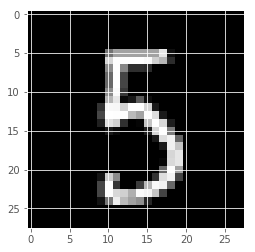

In [35]:
renderFig(x[6300])